In [2]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
d0 = pd.read_csv('../course/mnist_train.csv')

In [4]:
d0.shape

(42000, 785)

In [5]:
# Drop the label feature
l=d0['label']
d = d0.drop("label",axis=1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/utkarsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


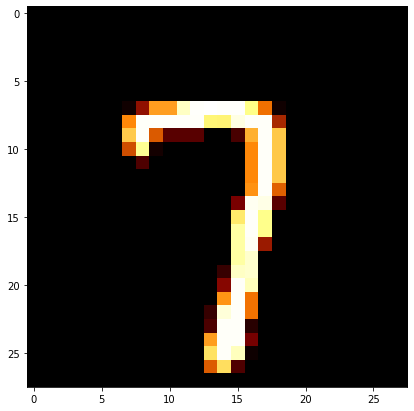

In [6]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 103

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
plt.show()

In [7]:
data = d.head(15000)
labels = l.head(15000)
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
print(l.shape)
standardized_data


(15000, 784)
(42000,)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


/Users/utkarsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


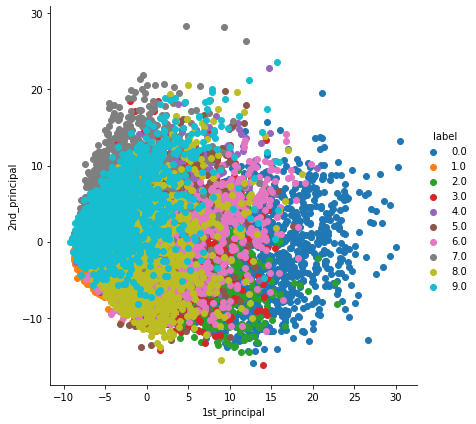

In [9]:
import seaborn as sn
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-9.80365038e-01  1.46130409e+01]
 [ 3.46531601e+01 -1.78613129e+01]
 [-4.25024033e+00  2.24010491e+00]
 [-2.03807697e+01 -1.53848009e+01]
 [ 3.50678368e+01 -1.76387863e+01]
 [ 2.10398388e+01 -7.23633862e+00]
 [-2.24752846e+01  2.60509133e+00]
 [-1.16581411e+01 -1.12079983e+01]
 [-5.05965233e+00 -1.24188652e+01]
 [ 6.55308342e+00 -1.40931406e+01]
 [-1.52444780e+00  2.63943253e+01]
 [-1.35124264e+01  2.12028236e+01]
 [-4.30042934e+00  4.71973515e+00]
 [-6.21814680e+00 -1.98905411e+01]
 [ 2.37826633e+00 -1.69649277e+01]
 [-5.42613506e+00  6.67669392e+00]
 [ 3.43274641e+00 -3.75329399e+00]
 [ 2.95196533e+01 -2.97738409e+00]
 [-1.42410669e+01  1.63968201e+01]
 [ 1.68233128e+01 -1.42670736e+01]
 [-7.30185151e-01  2.11365681e+01]
 [ 9.56353283e+00  1.57227964e+01]
 [ 4.75757980e+00 -4.78794670e+00]
 [ 3.40953178e+01 -1.55362816e+01]
 [ 3

/Users/utkarsh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


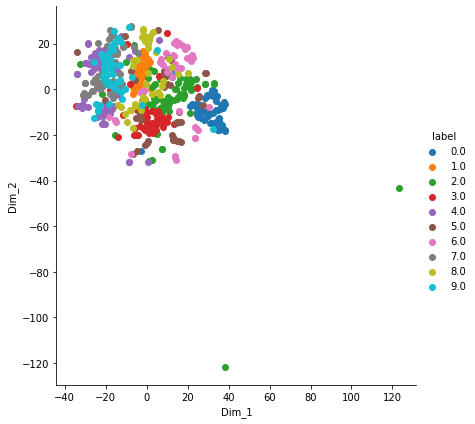

In [10]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:500,:]
labels_1000 = labels[0:500]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
print(data_1000)
tsne_data = model.fit_transform(data_1000)
print(tsne_data)
print(tsne_data[0])
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
print(tsne_data[0])
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
print(tsne_df.head())
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [11]:
from scipy.sparse import coo_matrix, vstack
A = coo_matrix([[1, 2], [3, 4]])
B = coo_matrix([[5, 6]])
vstack([A, B]).toarray()

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int64)

In [12]:
from scipy.sparse import coo_matrix, hstack
A = coo_matrix([[1, 2], [3, 4]])
B = coo_matrix([[5], [6]])
hstack([A, B]).toarray()

array([[1, 2, 5],
       [3, 4, 6]], dtype=int64)